# Gathering Data

In [5]:
from pandas import read_csv

In [6]:
url = 'https://raw.githubusercontent.com/achmatim/data-mining/main/Dataset/iris.csv'
df = read_csv(url)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Preparing Data

In [7]:
X = df.values[:, :-1]
y = df.values[:, -1]

X[0:4]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3.0, 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2]], dtype=object)

In [8]:
X = X.astype('float32')
X[0:4]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2]], dtype=float32)

In [10]:
from sklearn.preprocessing import LabelEncoder
y = LabelEncoder().fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Split Data menjadi training dan testing dataset

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Ukuran x train :', X_train.shape)
print('Ukuran y train :', y_train.shape)
print()
print('Ukuran x test :', X_test.shape)
print('Ukuran y test :', y_test.shape)

Ukuran x train : (120, 4)
Ukuran y train : (120,)

Ukuran x test : (30, 4)
Ukuran y test : (30,)


# Deep Learning Model Life-Cycle

Define Model

In [14]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Sequential, Model, Input
from tensorflow.keras.layers import Dense

DEFINE MODEL SEQUENTIAL API 1

In [15]:
model = Sequential([
    Input(shape=(4,)),
    Dense(3, activation='relu'),
    Dense(3, activation='relu'),
    Dense(3, activation='softmax'),
], name='Sequential_API_1')

DEFINE MODEL SEQUENTIAL API 2

In [17]:
model = Sequential(name='Sequential_API_2')
model.add(Input(shape=4,))
model.add(Dense(3, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(3, activation='softmax'))

DEFINE MODEL FUNCTIONAL API

In [18]:
input_layer = Input(shape=(4,))
hid_layer_1 = Dense(3, activation='relu')(input_layer)
hid_layer_2 = Dense(3, activation='relu')(hid_layer_1)
output_layer = Dense(3, activation='softmax')(hid_layer_2)

model = Model(inputs=input_layer, outputs=output_layer, name='Functional_API')

Model Text Decsription

In [19]:
model.summary()

Model: "Functional_API"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense_6 (Dense)             (None, 3)                 15        
                                                                 
 dense_7 (Dense)             (None, 3)                 12        
                                                                 
 dense_8 (Dense)             (None, 3)                 12        
                                                                 
Total params: 39 (156.00 Byte)
Trainable params: 39 (156.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Model Architecture Plot

In [20]:
from tensorflow.keras.utils import plot_model

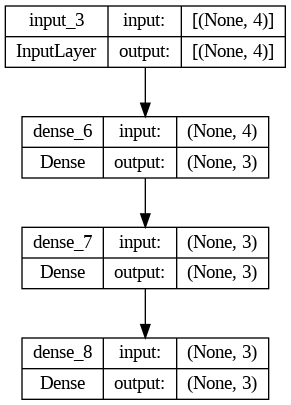

In [21]:
plot_model(model, 'model.png', show_shapes=True)

Compile model

In [22]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [23]:
model.compile(
    optimizer = Adam(learning_rate=0.001),
    loss = SparseCategoricalCrossentropy(),
    metrics =['Accuracy']
)

In [24]:
hits = model.fit(
    x = X_train,
    y = y_train,
    validation_data = (X_test, y_test),
    batch_size = 32,
    epochs = 200,
    verbose = 2
)

Epoch 1/200
4/4 - 2s - loss: 1.2775 - Accuracy: 0.3250 - val_loss: 1.2696 - val_Accuracy: 0.3667 - 2s/epoch - 397ms/step
Epoch 2/200
4/4 - 0s - loss: 1.2677 - Accuracy: 0.3250 - val_loss: 1.2614 - val_Accuracy: 0.3667 - 76ms/epoch - 19ms/step
Epoch 3/200
4/4 - 0s - loss: 1.2597 - Accuracy: 0.3250 - val_loss: 1.2532 - val_Accuracy: 0.3667 - 76ms/epoch - 19ms/step
Epoch 4/200
4/4 - 0s - loss: 1.2515 - Accuracy: 0.3250 - val_loss: 1.2453 - val_Accuracy: 0.3667 - 67ms/epoch - 17ms/step
Epoch 5/200
4/4 - 0s - loss: 1.2440 - Accuracy: 0.3250 - val_loss: 1.2378 - val_Accuracy: 0.3667 - 60ms/epoch - 15ms/step
Epoch 6/200
4/4 - 0s - loss: 1.2366 - Accuracy: 0.3250 - val_loss: 1.2306 - val_Accuracy: 0.3667 - 92ms/epoch - 23ms/step
Epoch 7/200
4/4 - 0s - loss: 1.2296 - Accuracy: 0.3250 - val_loss: 1.2239 - val_Accuracy: 0.3667 - 339ms/epoch - 85ms/step
Epoch 8/200
4/4 - 0s - loss: 1.2224 - Accuracy: 0.3167 - val_loss: 1.2177 - val_Accuracy: 0.3667 - 62ms/epoch - 16ms/step
Epoch 9/200
4/4 - 0s - l

Ploting learning curves

In [26]:
from matplotlib import pyplot

NameError: name 'hist' is not defined

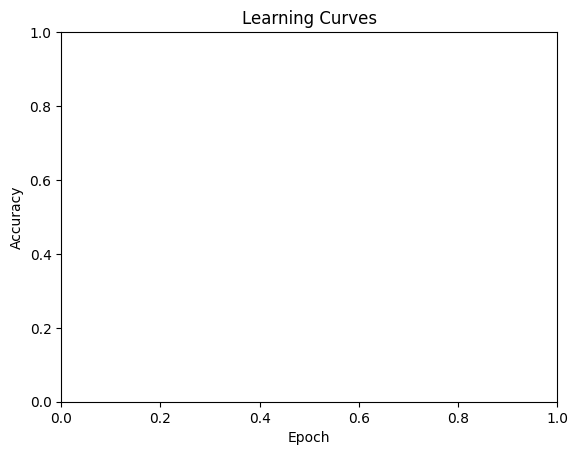

In [28]:
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Accuracy')
pyplot.plot(hist.history['Accuracy'], label='train')
pyplot.plot(hist.history['val_accuracy'], label='val')
pyplot.legend()
pyplot.show()

NameError: name 'hist' is not defined

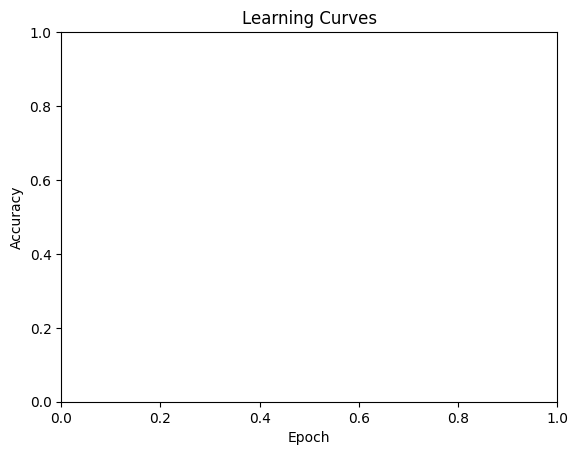

In [29]:
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Accuracy')
pyplot.plot(hist.history['loss'], label='train loss')
pyplot.plot(hist.history['val_loss'], label='val loss')
pyplot.legend()
pyplot.show()

Evaluasi Model

In [31]:
loss, acc = model.evaluate(X_test, y_test, verbose=2)
print(f'Test Accuracy: {acc}')

1/1 - 0s - loss: 0.6454 - Accuracy: 0.7000 - 57ms/epoch - 57ms/step
Test Accuracy: 0.699999988079071


Bangun prediction

In [32]:
from numpy import argmax

In [34]:
#input data baru
new_sepal_length = float(input('Input Sepal Length :'))
new_sepal_width = float(input('Input Sepal width :'))
new_petal_length = float(input('Input Petal Length :'))
new_petal_width = float(input('Input Pepal Length :'))

new_data = [new_sepal_length, new_sepal_width, new_petal_length, new_petal_width]

#prediksi data baru lalu cari classnya
y_pred = model.predict([new_data])
y_class = argmax(y_pred)

#cetak hasil prediksi
print(f'\nHasil Prediksi:{y_pred} (class={y_class}) \n')

if y_class == 0:
  print('Iris Setosa')
elif y_class == 1:
  print('Iris Versicolor')
elif y_class == 2:
  print('Iris Virginica')


Input Sepal Length :2
Input Sepal width :2
Input Petal Length :3
Input Pepal Length :3
1/1 [==============================] - 0s 105ms/step

Hasil Prediksi:[[0.17697717 0.41873062 0.40429214]] (class=1) 

Iris Versicolor


Simpan Model

In [35]:
model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Load Model

In [36]:
from tensorflow.keras.models import load_model

In [44]:
model = load_model('model.h5')

new_data = [5.1, 3.5, 1.4, 0.2]
y_pred = model.predict([new_data])
print('\nPredicted:%s (class=%d)') % (y_pred, argmax(y_pred))

1/1 [==============================] - 0s 75ms/step

Predicted:%s (class=%d)


TypeError: unsupported operand type(s) for %: 'NoneType' and 'tuple'

# DL Techniques

Dropout

In [45]:
from tensorflow.keras.layers import Dropout

In [46]:
model = Sequential(name='Dropout_Example')
model.add(Dense(100, input_shape=(10,)))
model.add(Dense(80))
model.add(Dropout(0.5)) #dropout 50% neuron dari hiden layer 2
model.add(Dense(30))
model.add(Dropout(0.4)) #dropout 40% neuron dari hiden layer 3
model.add(Dense(10))
model.add(Dropout(0.2)) #dropout 20% neuron dari hiden layer 4
model.add(Dense(5))
model.add(Dense(1))

model.summary()

Model: "Dropout_Example"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 100)               1100      
                                                                 
 dense_10 (Dense)            (None, 80)                8080      
                                                                 
 dropout (Dropout)           (None, 80)                0         
                                                                 
 dense_11 (Dense)            (None, 30)                2430      
                                                                 
 dropout_1 (Dropout)         (None, 30)                0         
                                                                 
 dense_12 (Dense)            (None, 10)                310       
                                                                 
 dropout_2 (Dropout)         (None, 10)            

Batch Normalization

In [47]:
from tensorflow.keras.layers import BatchNormalization

In [48]:
model = Sequential(name='Batch_Normalization_Example')
model.add(Dense(100, input_shape=(10,)))
model.add(BatchNormalization())
model.add(Dense(80))
model.add(BatchNormalization())
model.add(Dense(30))
model.add(BatchNormalization())
model.add(Dense(10))
model.add(Dense(5))
model.add(Dense(1))

model.summary()

Model: "Batch_Normalization_Example"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 100)               1100      
                                                                 
 batch_normalization (Batch  (None, 100)               400       
 Normalization)                                                  
                                                                 
 dense_16 (Dense)            (None, 80)                8080      
                                                                 
 batch_normalization_1 (Bat  (None, 80)                320       
 chNormalization)                                                
                                                                 
 dense_17 (Dense)            (None, 30)                2430      
                                                                 
 batch_normalization_2 (Bat  (None, 30)